In [1]:
import pandas as pd

# Load the training and test datasets
train_data = pd.read_csv('C:/Users/91898/Desktop/datascience_pracatice/Hackthon/train_loan_data (1).csv')
test_data = pd.read_csv("C:/Users/91898/Desktop/datascience_pracatice/Hackthon/test_loan_data (1).csv")

In [2]:
# Check the dimensions of the datasets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (80000, 28)
Testing data shape: (20000, 27)


In [3]:
train_data.head()

addr_state  annual_inc earliest_cr_line emp_length  \
0         CO     85000.0           Jul-97  10+ years   
1         CA     40000.0           Apr-87  10+ years   
2         FL     60000.0           Aug-07  10+ years   
3         IL    100742.0           Sep-80  10+ years   
4         MD     80000.0           Jul-99  10+ years   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy              744             740     E   
1  Department of Veterans Affairs              724             720     B   
2                Marble polishing              679             675     B   
3                         printer              664             660     B   
4                   Southern Mgmt              669             665     F   

  home_ownership application_type  ... pub_rec_bankruptcies  \
0       MORTGAGE       Individual  ...                  0.0   
1           RENT       Individual  ...                  0.0   
2       MORTGAGE       Individual  ...                  0.0   
3       MORTGAGE       Individual  ...                  0.0   
4           RENT       Individual  ...                  0.0   

              purpose  revol_bal  revol_util  sub_grade        term  \
0  debt_consolidation       5338        93.6         E1   60 months   
1  debt_consolidation      19944        60.3         B1   36 months   
2  debt_consolidation      23199        88.5         B5   36 months   
3  debt_consolidation      18425        69.0         B2   36 months   
4  debt_consolidation      34370        90.0         F5   60 months   

                 title  total_acc  verification_status loan_status  
0   Debt consolidation          8      Source Verified   Defaulted  
1          Credit Loan         12             Verified        Paid  
2   Debt consolidation         16      Source Verified        Paid  
3   Debt consolidation         19      Source Verified        Paid  
4  Debt Connsolidation         59             Verified        Paid  

[5 rows x 28 columns]

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

# EDA 

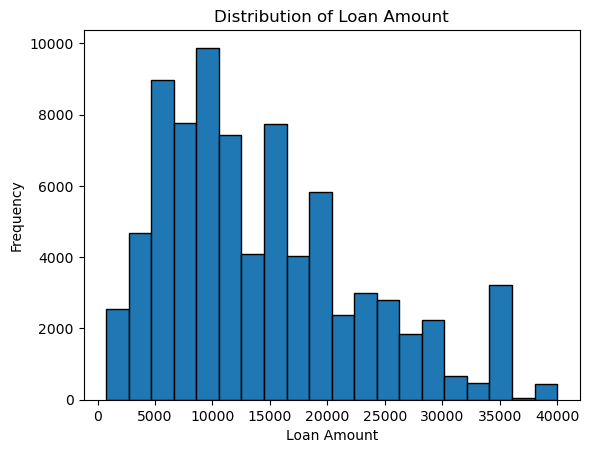

In [5]:
import matplotlib.pyplot as plt

# Histogram for a numerical feature
plt.hist(train_data['loan_amnt'], bins=20, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.show()


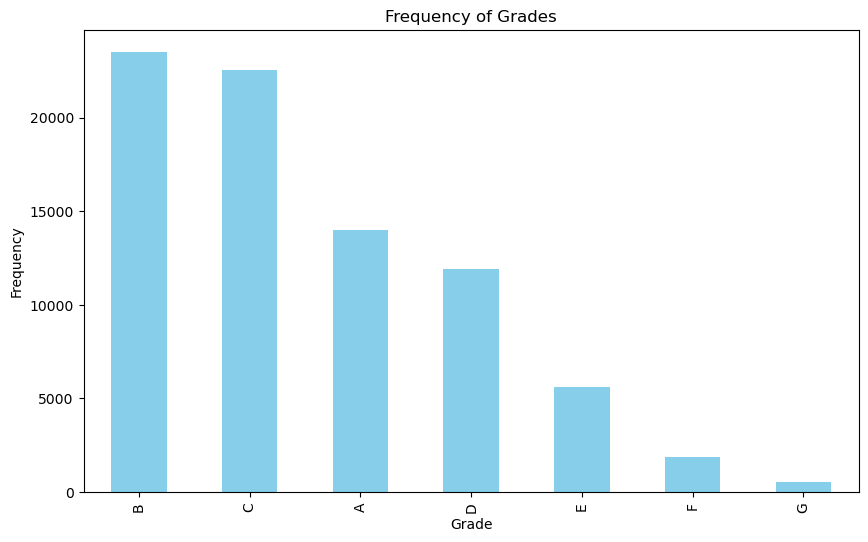

In [6]:
# Bar plot for a categorical feature
plt.figure(figsize=(10, 6))
train_data['grade'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Frequency of Grades')
plt.show()


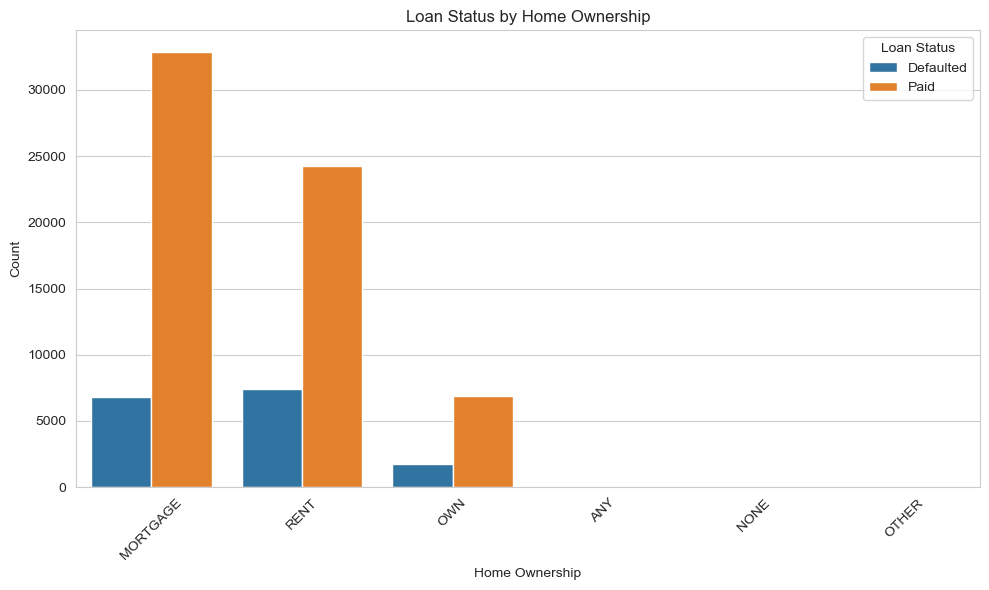

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Create a count plot for loan status and home ownership
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='home_ownership', hue='loan_status')
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


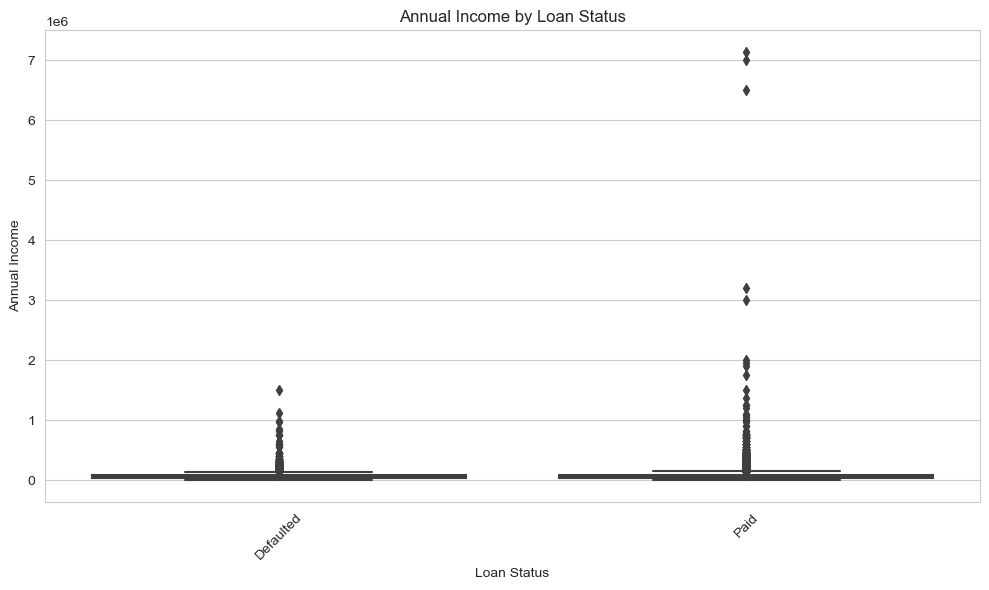

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Create a box plot for annual income and loan status
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='loan_status', y='annual_inc')
plt.title('Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


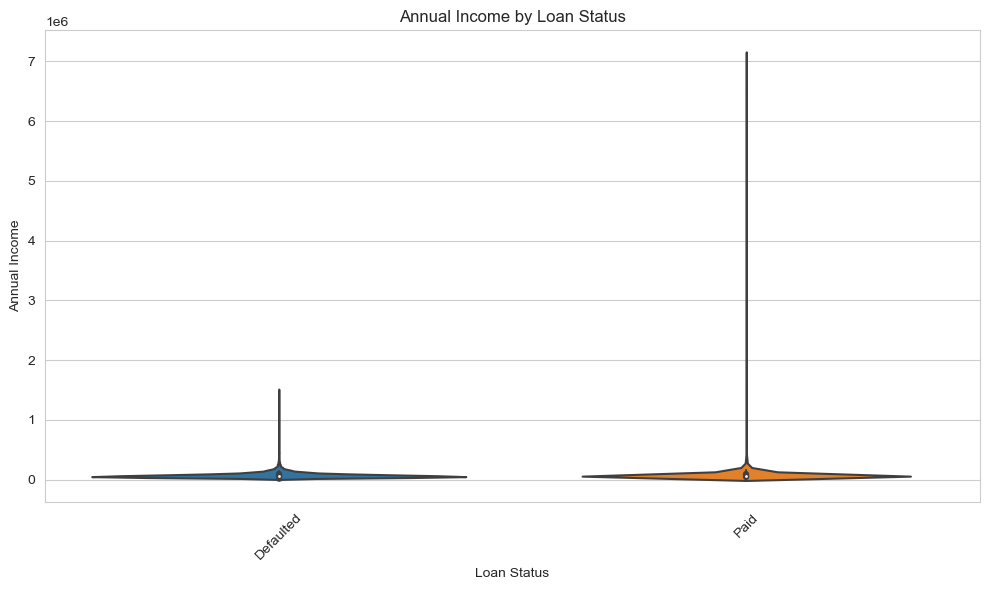

In [9]:
# Create a violin plot for annual income and loan status
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_data, x='loan_status', y='annual_inc')
plt.title('Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


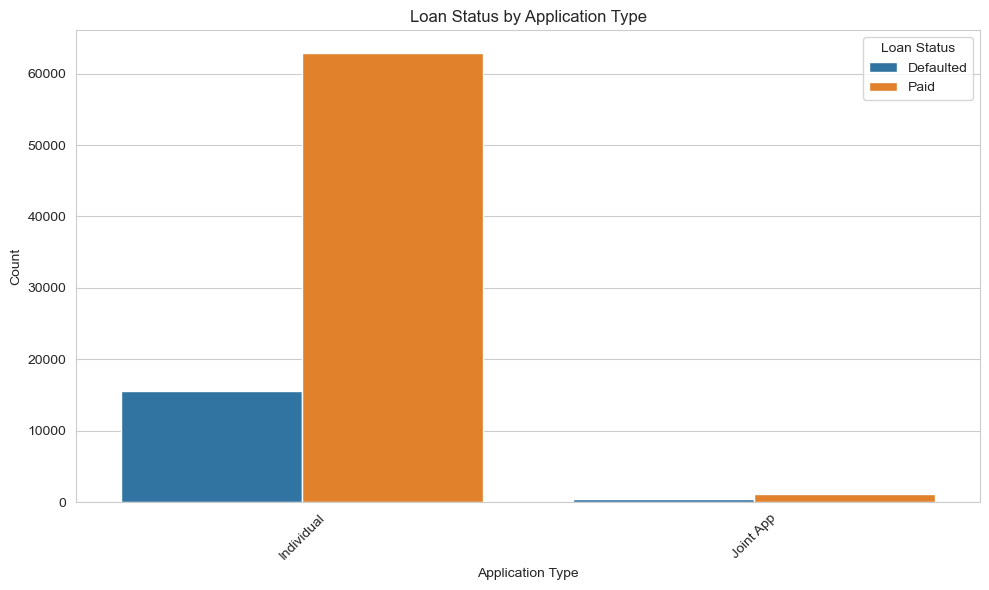

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Create a count plot for application type and loan status
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='application_type', hue='loan_status')
plt.title('Loan Status by Application Type')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()


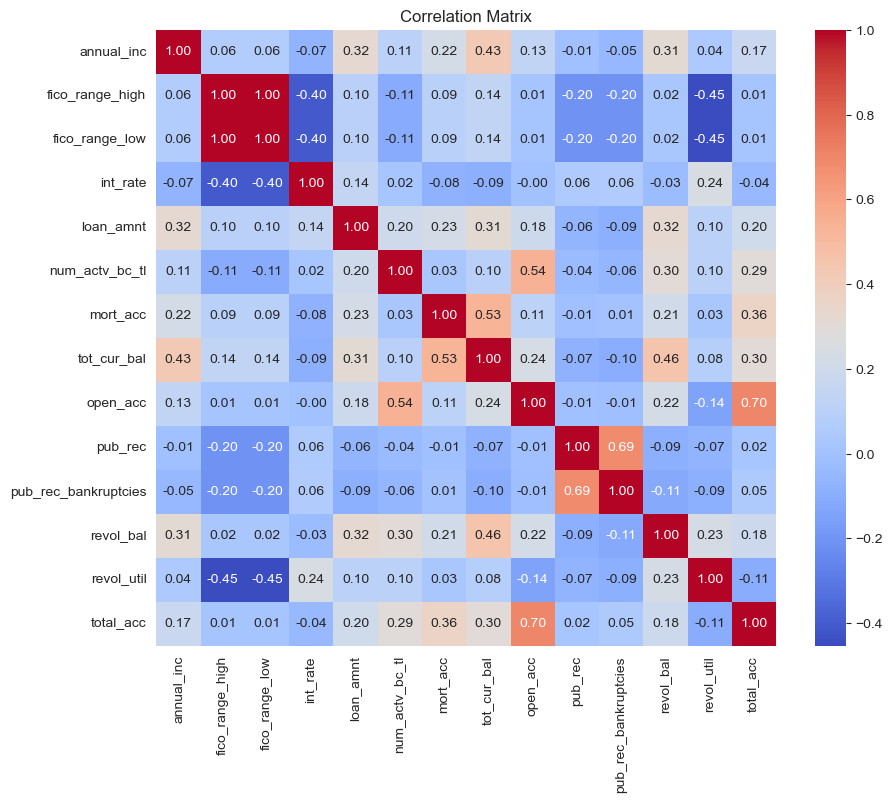

In [11]:
# Correlation matrix
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


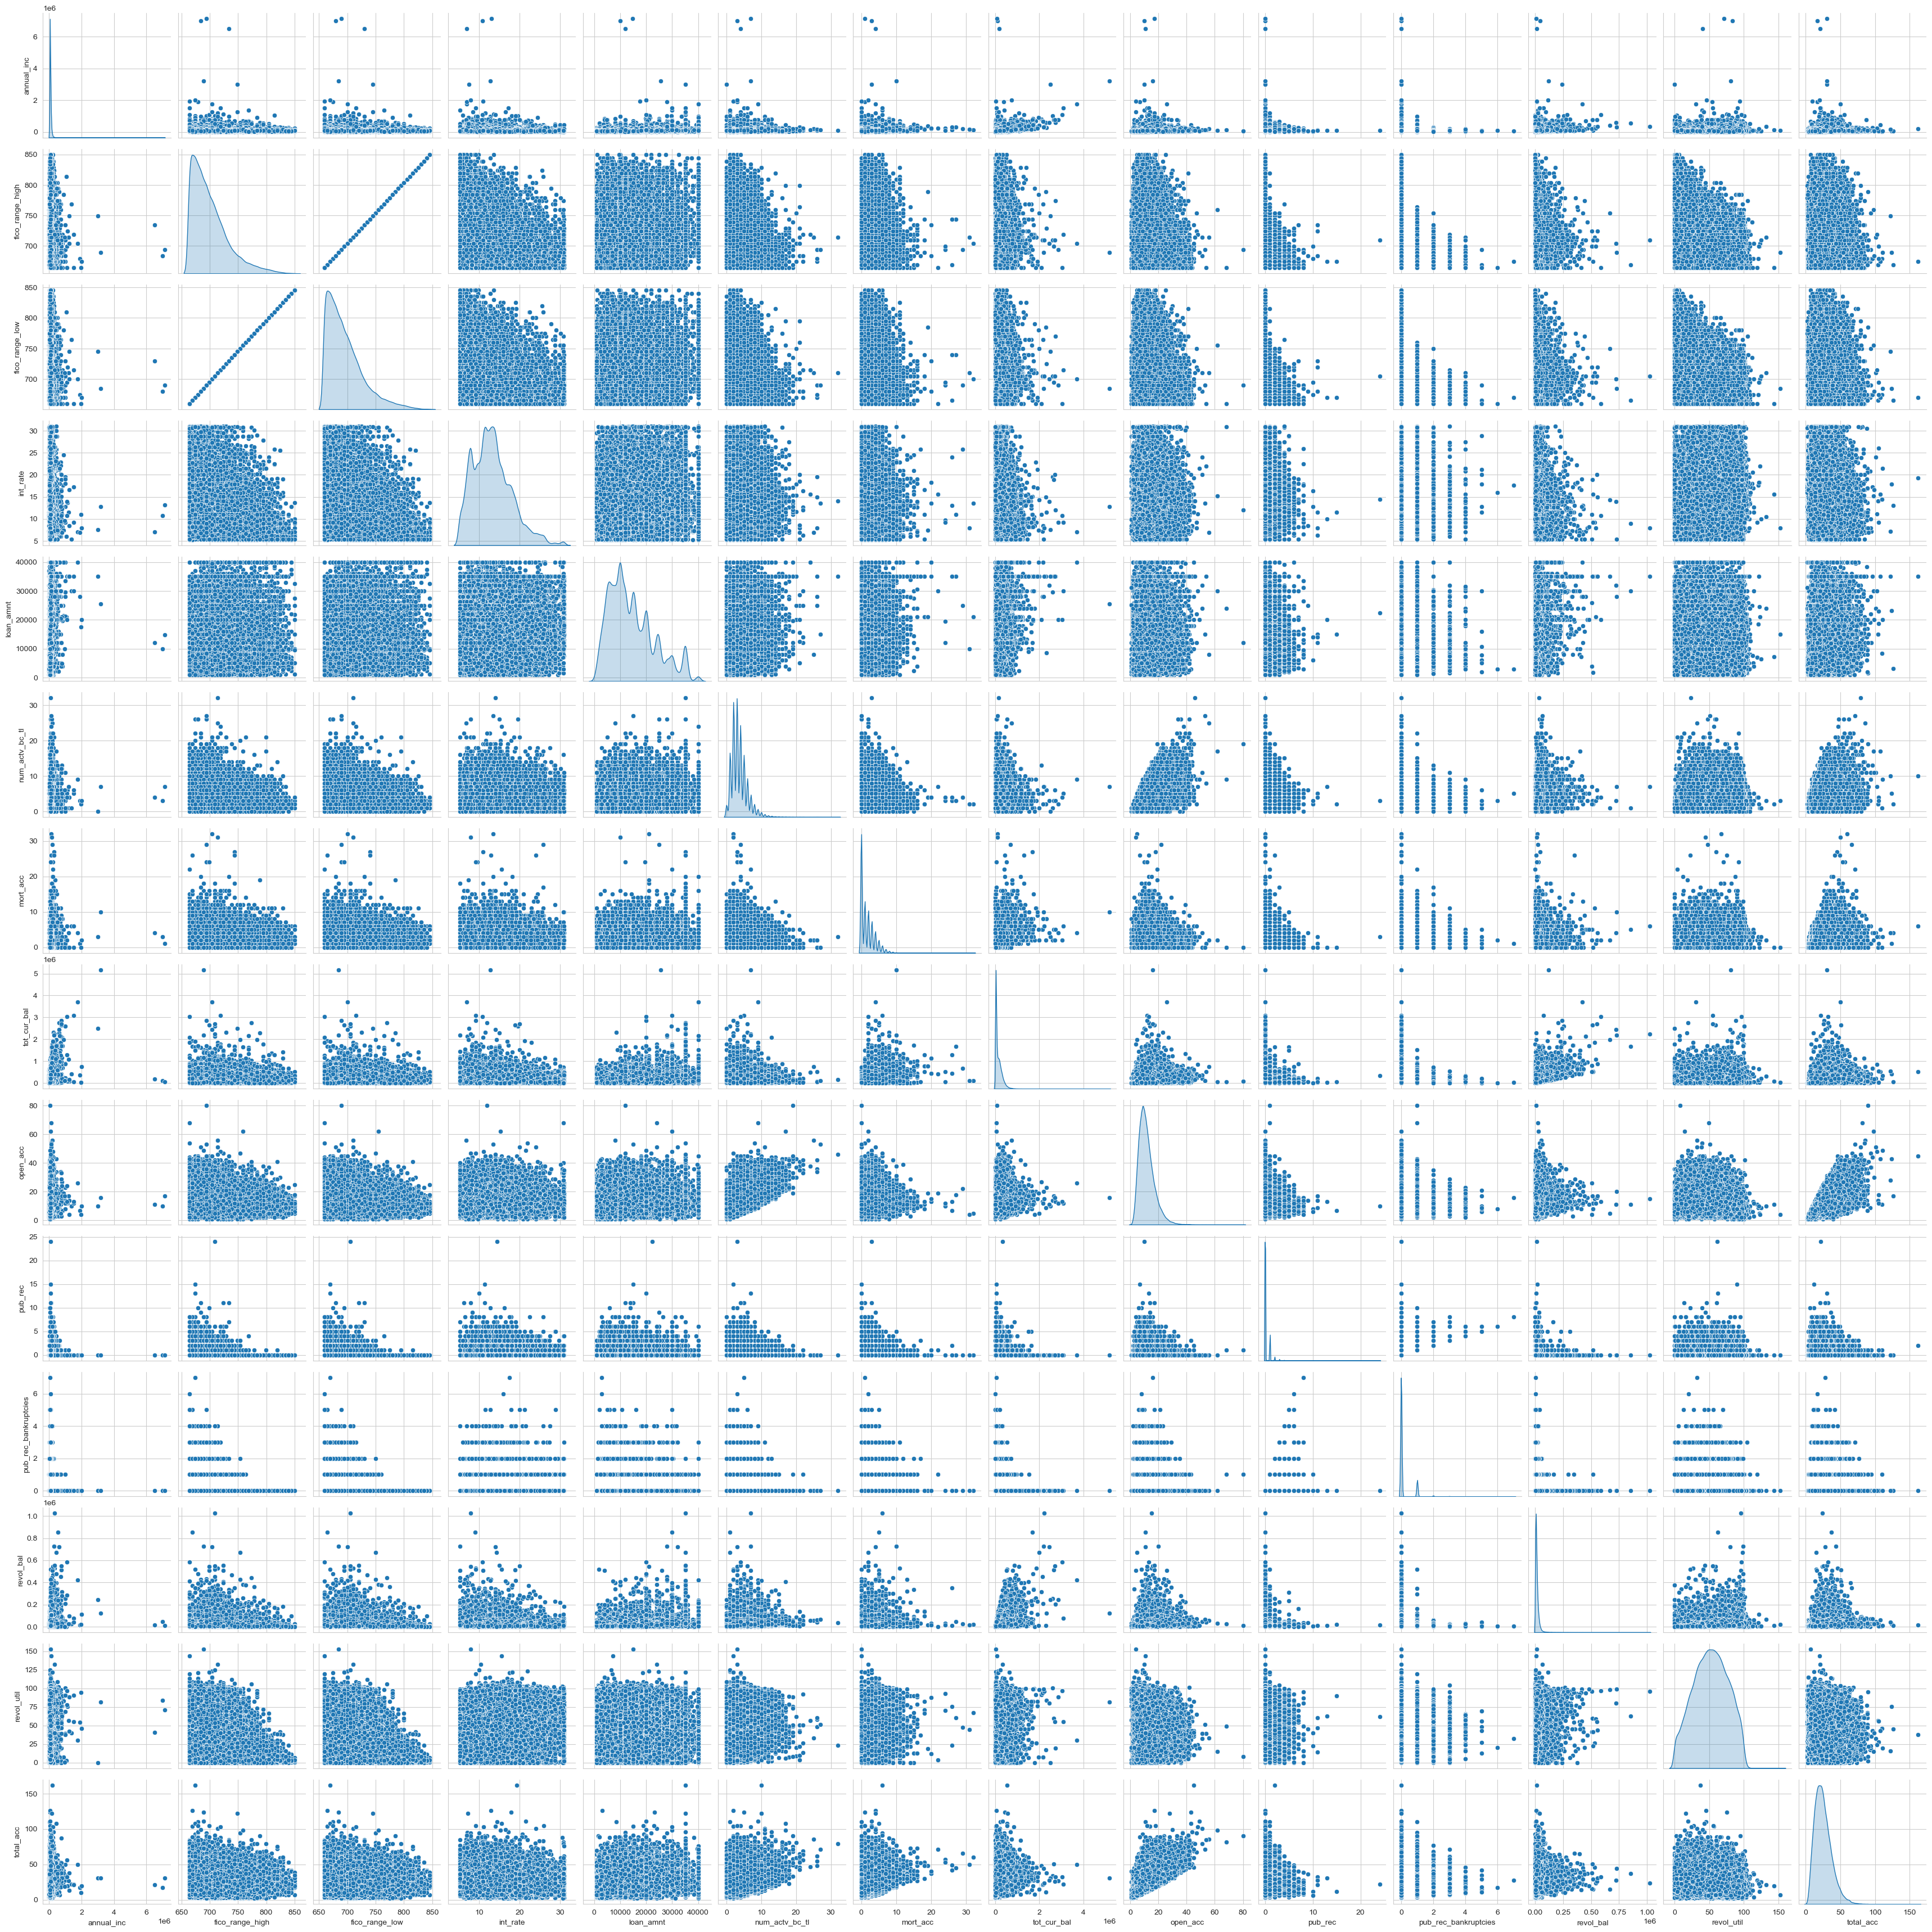

In [12]:
import seaborn as sns

# Pairplot
sns.pairplot(train_data, diag_kind='kde')
plt.show()


# Missing Value Treatment

In [13]:
# Check for missing values in training data
print("Missing values in training data:\n", train_data.isnull().sum())

# Check for missing values in testing data
print("\nMissing values in testing data:\n", test_data.isnull().sum())

Missing values in training data:
 addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

Missing values in testing data:
 addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length          

In [14]:
import numpy as np
# Impute missing values in training data
train_numeric_features = train_data.select_dtypes(include=[np.number]).columns.tolist()
train_categorical_features = train_data.select_dtypes(include=[np.object]).columns.tolist()

# Replace missing values in numeric features with mean
train_data[train_numeric_features] = train_data[train_numeric_features].fillna(train_data[train_numeric_features].mean())

# Replace missing values in categorical features with mode
for feature in train_categorical_features:
    train_data[feature].fillna(train_data[feature].mode()[0], inplace=True)

# Verify missing values in training data
print("Missing values after handling in training data:\n", train_data.isnull().sum())

# Impute missing values in testing data
test_numeric_features = test_data.select_dtypes(include=[np.number]).columns.tolist()
test_categorical_features = test_data.select_dtypes(include=[np.object]).columns.tolist()

# Replace missing values in numeric features with mean
test_data[test_numeric_features] = test_data[test_numeric_features].fillna(test_data[test_numeric_features].mean())

# Replace missing values in categorical features with mode
for feature in test_categorical_features:
    test_data[feature].fillna(test_data[feature].mode()[0], inplace=True)

# Verify missing values in testing data
print("\nMissing values after handling in testing data:\n", test_data.isnull().sum())


C:\Users\91898\AppData\Local\Temp\ipykernel_23892\949388421.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_categorical_features = train_data.select_dtypes(include=[np.object]).columns.tolist()


Missing values after handling in training data:
 addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64

Missing values after handling in testing data:
 addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_

C:\Users\91898\AppData\Local\Temp\ipykernel_23892\949388421.py:18: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_categorical_features = test_data.select_dtypes(include=[np.object]).columns.tolist()


# Handling Outliers

In [15]:
# Calculate summary statistics for numerical features
summary_stats = train_data.describe()

# Display summary statistics
print(summary_stats)

         annual_inc  fico_range_high  fico_range_low      int_rate  \
count  8.000000e+04     80000.000000    80000.000000  80000.000000   
mean   7.604614e+04       699.987975      695.987813     13.232898   
std    6.902006e+04        31.734840       31.734075      4.771705   
min    0.000000e+00       664.000000      660.000000      5.310000   
25%    4.600000e+04       674.000000      670.000000      9.750000   
50%    6.500000e+04       694.000000      690.000000     12.740000   
75%    9.000000e+04       714.000000      710.000000     15.990000   
max    7.141778e+06       850.000000      845.000000     30.990000   

          loan_amnt  num_actv_bc_tl      mort_acc   tot_cur_bal      open_acc  \
count  80000.000000    80000.000000  80000.000000  8.000000e+04  80000.000000   
mean   14403.867813        3.633790      1.674759  1.415864e+05     11.605675   
std     8703.826298        2.205971      1.970071  1.553891e+05      5.483362   
min      750.000000        0.000000      0.00

In [16]:
# Calculate interquartile range (IQR) for each numerical feature
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers using IQR method
outliers = ((train_data < (Q1 - 1.5 * IQR)) | (train_data > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers detected using IQR method:\n", outliers)


C:\Users\91898\AppData\Local\Temp\ipykernel_23892\1711665626.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((train_data < (Q1 - 1.5 * IQR)) | (train_data > (Q3 + 1.5 * IQR))).sum()


Number of outliers detected using IQR method:
 addr_state                  0
annual_inc               3896
application_type            0
earliest_cr_line            0
emp_length                  0
emp_title                   0
fico_range_high          2692
fico_range_low           2692
grade                       0
home_ownership              0
initial_list_status         0
int_rate                 1497
loan_amnt                 431
loan_status                 0
mort_acc                 1057
num_actv_bc_tl           1634
open_acc                 2774
pub_rec                 13631
pub_rec_bankruptcies    10138
purpose                     0
revol_bal                4806
revol_util                  3
sub_grade                   0
term                        0
title                       0
tot_cur_bal              3056
total_acc                1363
verification_status         0
dtype: int64


In [17]:
from scipy.stats.mstats import winsorize

# Apply Winsorization to handle outliers
train_data_winsorized = train_data.copy()

# Define the percentage of data to be winsorized (e.g., 5%)
winsorization_percentage = 0.05

# Winsorize numerical features except for 'loan_status' (target variable)
for column in train_data_winsorized.columns:
    if train_data_winsorized[column].dtype in ['int64', 'float64'] and column != 'loan_status':
        train_data_winsorized[column] = winsorize(train_data_winsorized[column], limits=(winsorization_percentage, winsorization_percentage))

# Verify the number of outliers after Winsorization
outliers_after_winsorization = ((train_data_winsorized < (Q1 - 1.5 * IQR)) | (train_data_winsorized > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers after Winsorization:\n", outliers_after_winsorization)


C:\Users\91898\AppData\Local\Temp\ipykernel_23892\2666204052.py:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_after_winsorization = ((train_data_winsorized < (Q1 - 1.5 * IQR)) | (train_data_winsorized > (Q3 + 1.5 * IQR))).sum()


Number of outliers after Winsorization:
 addr_state                  0
annual_inc                  0
application_type            0
earliest_cr_line            0
emp_length                  0
emp_title                   0
fico_range_high             0
fico_range_low              0
grade                       0
home_ownership              0
initial_list_status         0
int_rate                    0
loan_amnt                   0
loan_status                 0
mort_acc                    0
num_actv_bc_tl              0
open_acc                    0
pub_rec                 13631
pub_rec_bankruptcies    10138
purpose                     0
revol_bal                4806
revol_util                  0
sub_grade                   0
term                        0
title                       0
tot_cur_bal                 0
total_acc                   0
verification_status         0
dtype: int64


In [18]:
# Further investigation of 'pub_rec', 'pub_rec_bankruptcies', and 'revol_bal'
print(train_data[['pub_rec', 'pub_rec_bankruptcies', 'revol_bal']].describe())

# Consider alternative treatment techniques or consult domain experts to determine the next steps


            pub_rec  pub_rec_bankruptcies     revol_bal
count  80000.000000          80000.000000  8.000000e+04
mean       0.216675              0.137103  1.628934e+04
std        0.579854              0.383128  2.264915e+04
min        0.000000              0.000000  0.000000e+00
25%        0.000000              0.000000  5.965750e+03
50%        0.000000              0.000000  1.111100e+04
75%        0.000000              0.000000  1.963500e+04
max       24.000000              7.000000  1.023940e+06


In [19]:
# Further investigation of records with the highest values of 'pub_rec' and 'pub_rec_bankruptcies'
max_pub_rec_records = train_data[train_data['pub_rec'] == train_data['pub_rec'].max()]
max_pub_rec_bankruptcies_records = train_data[train_data['pub_rec_bankruptcies'] == train_data['pub_rec_bankruptcies'].max()]

print("Records with the highest value of 'pub_rec':\n", max_pub_rec_records)
print("\nRecords with the highest value of 'pub_rec_bankruptcies':\n", max_pub_rec_bankruptcies_records)


Records with the highest value of 'pub_rec':
       addr_state  annual_inc earliest_cr_line emp_length  emp_title  \
38934         FL     96000.0           May-00    6 years  Principal   

       fico_range_high  fico_range_low grade home_ownership application_type  \
38934              709             705     C       MORTGAGE       Individual   

       ... pub_rec_bankruptcies             purpose  revol_bal  revol_util  \
38934  ...                  0.0  debt_consolidation      15729        61.7   

       sub_grade        term               title  total_acc  \
38934         C4   36 months  Debt consolidation         22   

       verification_status loan_status  
38934             Verified        Paid  

[1 rows x 28 columns]

Records with the highest value of 'pub_rec_bankruptcies':
       addr_state  annual_inc earliest_cr_line emp_length emp_title  \
38825         NJ     48000.0           Jun-98    7 years   doorman   

       fico_range_high  fico_range_low grade home_ownership 

In [20]:
# Define the indices of the records with the highest values of 'pub_rec' and 'pub_rec_bankruptcies'
index_max_pub_rec = train_data['pub_rec'].idxmax()
index_max_pub_rec_bankruptcies = train_data['pub_rec_bankruptcies'].idxmax()

# Print the records with the highest values of 'pub_rec' and 'pub_rec_bankruptcies'
print("Record with the highest value of 'pub_rec':\n", train_data.loc[index_max_pub_rec])
print("\nRecord with the highest value of 'pub_rec_bankruptcies':\n", train_data.loc[index_max_pub_rec_bankruptcies])


Record with the highest value of 'pub_rec':
 addr_state                              FL
annual_inc                         96000.0
earliest_cr_line                    May-00
emp_length                         6 years
emp_title                        Principal
fico_range_high                        709
fico_range_low                         705
grade                                    C
home_ownership                    MORTGAGE
application_type                Individual
initial_list_status                      w
int_rate                             14.49
loan_amnt                            22425
num_actv_bc_tl                         3.0
mort_acc                               3.0
tot_cur_bal                       335602.0
open_acc                                10
pub_rec                                 24
pub_rec_bankruptcies                   0.0
purpose                 debt_consolidation
revol_bal                            15729
revol_util                            61.7
sub_grade

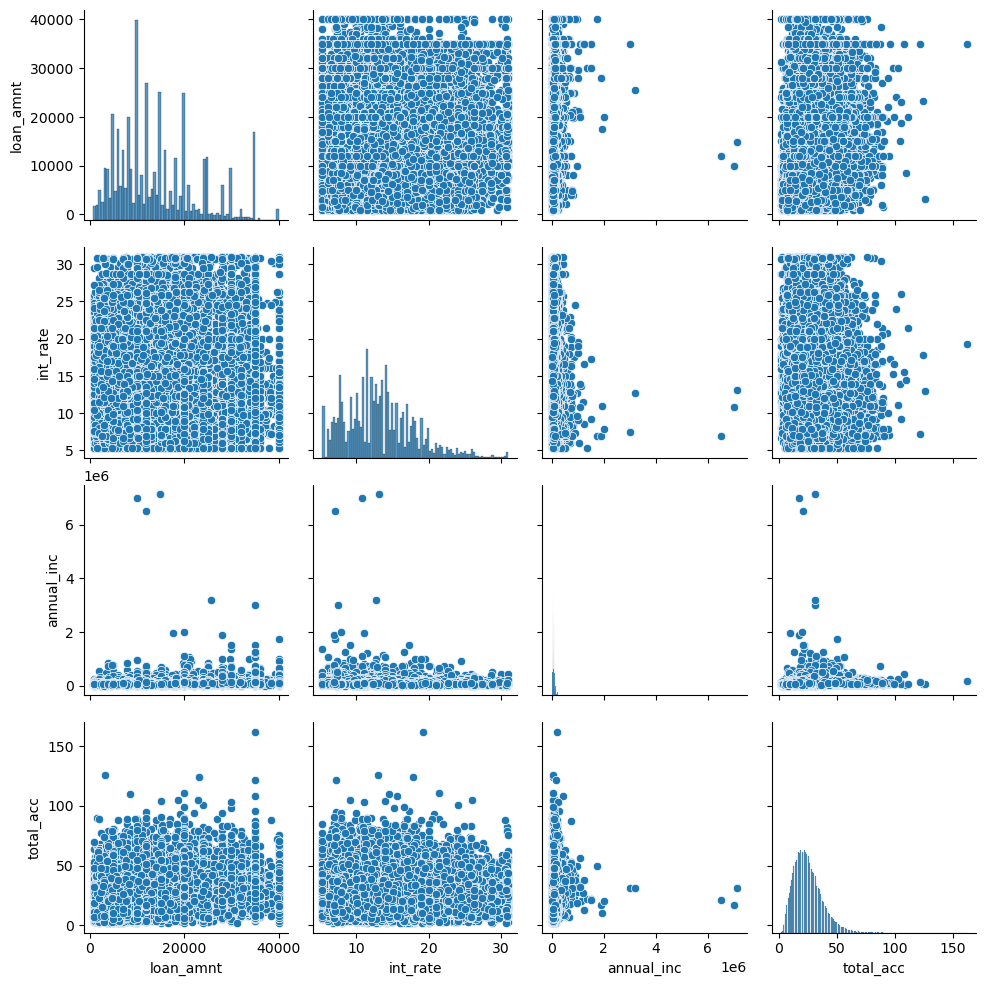

In [42]:
# Pair plot of selected features
selected_features = ['loan_amnt', 'int_rate', 'annual_inc', 'total_acc']
sns.pairplot(train_data[selected_features])
plt.show()

In [22]:
# Check for missing values
missing_values = train_data.isnull().sum()
missing_values


addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64

# Encoding and feature scaling

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            80000 non-null  object 
 4   emp_title             80000 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        80000 non-null  float64
 14  mort_acc              80000 non-null  float64
 15  tot_cur_bal        

In [37]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
df=train_data

# Load your dataset into a DataFrame (assuming df is your DataFrame)
# df = ...

# Extract categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize an empty sparse matrix
sparse_encoded_features = None

# Iterate over each categorical column and encode it
for col in categorical_columns:
    # Create a OneHotEncoder instance
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=True)
    
    # Fit-transform the current categorical column
    encoded_column = encoder.fit_transform(df[[col]])
    
    # Concatenate the encoded column with the existing sparse matrix
    if sparse_encoded_features is None:
        sparse_encoded_features = encoded_column
    else:
        sparse_encoded_features = hstack([sparse_encoded_features, encoded_column])

# Convert the sparse matrix to a DataFrame
encoded_df = pd.DataFrame.sparse.from_spmatrix(sparse_encoded_features)

# Optionally, concatenate the encoded DataFrame with the original DataFrame
# encoded_df = pd.concat([df, encoded_df], axis=1)

# Now you have the encoded DataFrame with sparse matrix representation


In [38]:
# Concatenate the encoded DataFrame with the original DataFrame
encoded_df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

# Now you have the encoded DataFrame with sparse matrix representation


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Split the encoded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_df, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the performance of the Random Forest classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)

# Initialize and train a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
gb_predictions = gb_classifier.predict(X_test)

# Evaluate the performance of the Gradient Boosting classifier
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)


C:\Users\91898\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\91898\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


MemoryError: Unable to allocate 10.1 GiB for an array with shape (64000, 42172) and data type float32

In [46]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Replace 'X_encoded' with the appropriate DataFrame containing the encoded data
encoded_df.columns = [str(col) for col in encoded_df.columns]

# Define preprocessing steps for each type of column
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data
X_processed = preprocessor.fit_transform(encoded_df)

# Convert the processed data back to a DataFrame
numeric_feature_names = preprocessor.transformers_[0][-1]
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'] \
    .get_feature_names_out(input_features=categorical_features)
feature_names = list(numeric_feature_names) + list(categorical_feature_names)

X_processed_df = pd.DataFrame(X_processed, columns=feature_names)


ValueError: Shape of passed values is (80000, 1), indices imply (80000, 42156)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)
